In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

dataset = pd.read_csv('DATA_BALANCED_GESTANTES.csv')
X = dataset.iloc[:, 0:14].values
y = dataset.iloc[:, -1].values
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from keras import initializers
#uniforme = initializers.RandomUniform(minval=0.0, maxval=0.1, seed=None)
#ones1 = initializers.Ones()

In [11]:
def Model():
    classifier = Sequential()
    classifier.add(Dense(units = 14, kernel_initializer='uniform', activation = 'tanh', input_dim = 14))
    classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'tanh'))
    classifier.add(Dense(units = 1, kernel_initializer='uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam' , loss = 'mean_squared_error',  metrics = ['acc','mse']) 
    return classifier

from keras.wrappers.scikit_learn import KerasClassifier
classifier = Model()
history = classifier.fit(X_train, y_train, validation_split=0.25, batch_size = 10, epochs = 40)

print('\n', history.history.keys())

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Train on 27 samples, validate on 9 samples
Epoch 1/40
27/27 [==============================] - 2s 65ms/step - loss: 0.2500 - acc: 0.5556 - mean_squared_error: 0.2500 - val_loss: 0.2499 - val_acc: 0.4444 - val_mean_squared_error: 0.2499
Epoch 2/40
27/27 [==============================] - 0s 579us/step - loss: 0.2499 - acc: 0.5185 - mean_squared_error: 0.2499 - val_loss: 0.2499 - val_acc: 0.4444 - val_mean_squared_error: 0.2499
Epoch 3/40
27/27 [==============================] - 0s 578us/step - loss: 0.2499 - acc: 0.5185 - mean_squared_error: 0.2499 - val_loss: 0.2499 - val_acc: 0.4444 - val_mean_squared_error: 0.2499
Epoch 4/40
27/27 [==============================] - 0s 579us/step - loss: 0.2498 - acc: 0.5185 - mean_squared_error: 0.2498 - val_loss: 0.2498 - val_acc: 0.4444 - val_mean_squared_error: 0.2498
Epoch 5/40
27/27 [==============================] - 0s 579us/step - loss: 0.2498 - acc: 0.5185 - mean_squared_error: 0.2498 - val_loss: 0.2497 - val_acc: 0.4444 - val_mean_squared_er

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión: \n', cm,'\n')
print('Reporte de Metricas: \n',classification_report(y_test,y_pred),'\n')

Matriz de Confusión: 
 [[4 2]
 [1 5]] 

Reporte de Metricas: 
              precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.71      0.83      0.77         6

avg / total       0.76      0.75      0.75        12
 



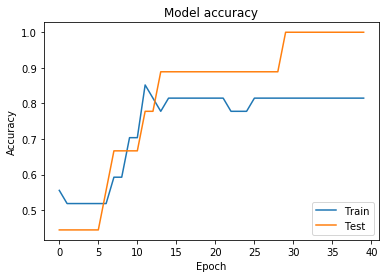

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

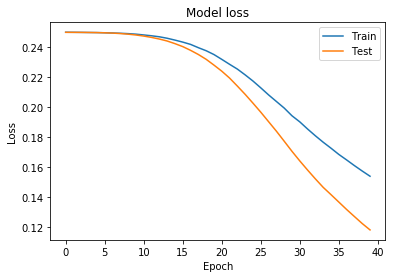

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

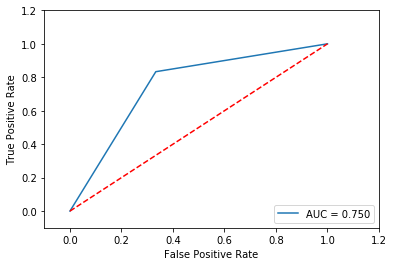

In [16]:
from sklearn.metrics import roc_curve, auc
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.plot(false_pos_rate, true_pos_rate,  label='AUC = %0.3f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:

dataset = pd.read_csv('DATABASE_GESTANTES_PREDICTION.csv')
X_valid = dataset.iloc[:, 0:14].values
y_valid = dataset.iloc[:, -1].values

c = sc.transform(X_valid)
new_prediction = classifier.predict([c])
new_prediction_class = (new_prediction>0.5)
prediction = (new_prediction>0.5)
#print(new_prediction)

In [26]:
header = ['EDAD','LUGAR_NACIMIENTO','EDUCACION','OCUPACION','ESTADO_CIVIL','TIPO_SEGURO','CANTIDAD_EMBARAZOS',
          'CANTIDAD_HIJOS','MENARQUIA_EDAD','DURACION_MENSTRUACION','TALLA','PESO','INDICE_MASA_CORPORAL',
          'TIPO_SOCIOECONOMICO','Class']
 
df = pd.DataFrame(dataset, columns=header)
df["Prediction"] = new_prediction
df.to_csv("MLP_PREDICTION.csv", sep=",", index=False, float_format="%.6f")

In [29]:
#cm = confusion_matrix(y_valid, prediction)

#print('Matriz de Confusión: \n', cm,'\n')
#print('Reporte de Metricas: \n',classification_report(y_valid,prediction),'\n')

Text(0.5, 1.0, 'Dataset Prediction Anemia')

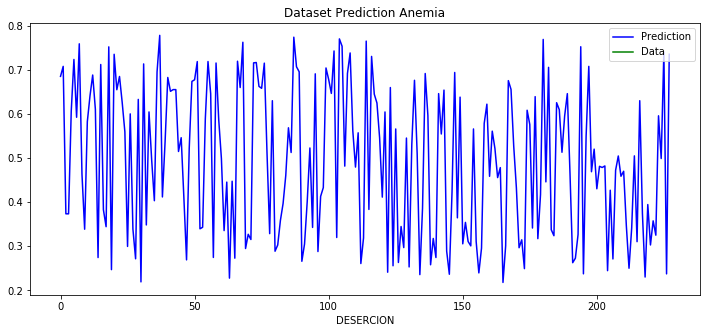

In [32]:
X_valid = dataset.iloc[:, 0:14].values
y_valid = dataset.iloc[:, -1].values

fig = plt.figure(figsize=(12, 5))
plt.plot( new_prediction, 'b-', label='Prediction')
plt.plot( y_valid, 'g-', label='Data')
plt.legend(loc='upper right')
plt.xlabel('DESERCION')
plt.title('Dataset Prediction Anemia')